# Creating the initial conditions

In [1]:
from roms_tools import Grid, InitialConditions

We start by creating a grid that contains Iceland and has a horizontal resolution of 2 km and 100 vertical layers.

In [2]:
grid = Grid(
    nx=500,
    ny=500,
    size_x=1000,
    size_y=1000,
    center_lon=-20,
    center_lat=65,
    rot=0,
    N=100,
    topography_source={
        "name": "SRTM15",
        "path": "/global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc",
    },
)

Next, we specify the time that we want to make the initial conditions for.

In [3]:
from datetime import datetime

In [4]:
ini_time = datetime(2012, 1, 2, 12, 0, 0) # noon on January 2, 2012

## Physical initial conditions from GLORYS
In this section, we use GLORYS data to create our physical initial conditions, i.e., temperature, salinity, sea surface height, and velocities. (We will learn how to add biogeochemical initial conditions further down in the notebook.) Our downloaded GLORYS data sits at the following location.

In [5]:
path = "/global/cfs/projectdirs/m4746/Datasets/GLORYS/NA/2012/mercatorglorys12v1_gl12_mean_20120102.nc"

<div class="alert alert-info">

Note

It would also be okay to provide a filename that contains data for more than just the day of interest. `ROMS-Tools` will pick out the correct day (and complain if the day of interest is not in the provided filename.) Or we can even use wildcards, such as `path="/global/cfs/projectdirs/m4746/Datasets/GLORYS/NA/2012/*.nc"`. Note, however, that `ROMS-Tools` will operate more efficiently when the filename is as specific as possible.
    
</div>

You can also download your own GLORYS data, which must span the desired ROMS domain and `ini_time`. For more details, please refer to [this page](https://roms-tools.readthedocs.io/en/latest/datasets.html).

We can now create the `InitialConditions` object.

In [6]:
%%time

initial_conditions = InitialConditions(
    grid=grid,
    ini_time=ini_time,
    source={"name": "GLORYS", "path": path},
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)

CPU times: user 1min 5s, sys: 146 ms, total: 1min 5s
Wall time: 1.57 s


<div class="alert alert-info">

Note

In the cell above, we created our initial conditions with `use_dask = True`. This enables `Dask`, a Python library designated to facilitate scalable, out-of-memory data processing by distributing computations across multiple threads or processes. [Here](https://roms-tools.readthedocs.io/en/latest/using_dask.html) you can learn more about using `Dask` with `ROMS-Tools`.

</div>

The initial conditions variables are held in an `xarray.Dataset` that is accessible via the `.ds` property.

In [7]:
initial_conditions.ds

<xarray.Dataset> Size: 508MB
Dimensions:     (ocean_time: 1, s_rho: 100, eta_rho: 502, xi_rho: 502,
                 xi_u: 501, eta_v: 501, s_w: 101)
Coordinates:
    abs_time    (ocean_time) datetime64[ns] 8B 2012-01-02T12:00:00
  * ocean_time  (ocean_time) float64 8B 3.788e+08
Dimensions without coordinates: s_rho, eta_rho, xi_rho, xi_u, eta_v, s_w
Data variables:
    temp        (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    u           (ocean_time, s_rho, eta_rho, xi_u) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    v           (ocean_time, s_rho, eta_v, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zeta        (ocean_time, eta_rho, xi_rho) float32 1MB -0.7428 ... -0.8718
    ubar        (ocean_time, eta_rho, xi_u) float32 1MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    vbar        (ocean_time, eta_v, xi_rho) float32 1MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    w           (ocean_time, s_w, eta_rho, xi_rho) float32 102MB 0.0 0.0 ... 0.0
    Cs_r        (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    Cs_w        (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   3.1.2.dev23+gc2b82bc5c
    ini_time:                             2012-01-02 12:00:00
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  False
    source:                               GLORYS
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

Let's make some plots! As an example, let's have a look at the temperature field `temp`. It is three-dimensional with horizontal dimensions `eta_rho` and `xi_rho`, and vertical dimension `s_rho`.

We first want to plot different layers of the temperature field, i.e., slice along the vertical dimension `s`.

[########################################] | 100% Completed | 7.20 sms


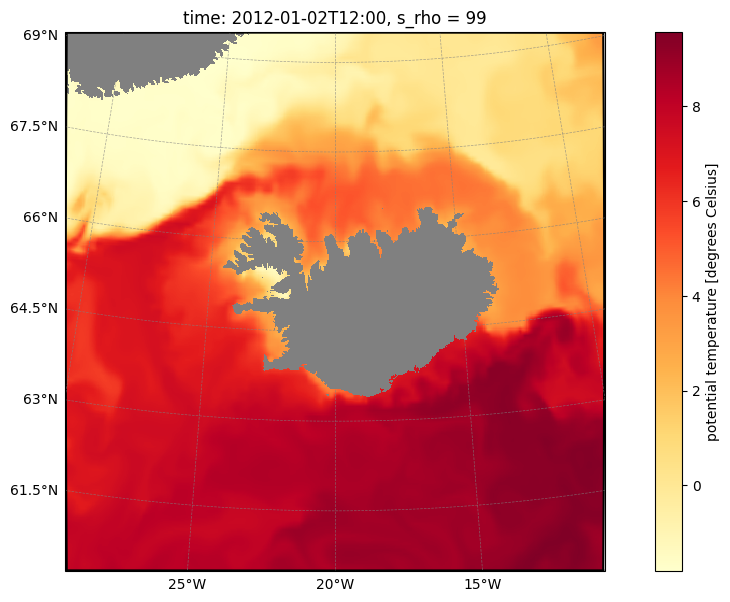

In [8]:
initial_conditions.plot("temp", s=-1)  # plot uppermost layer

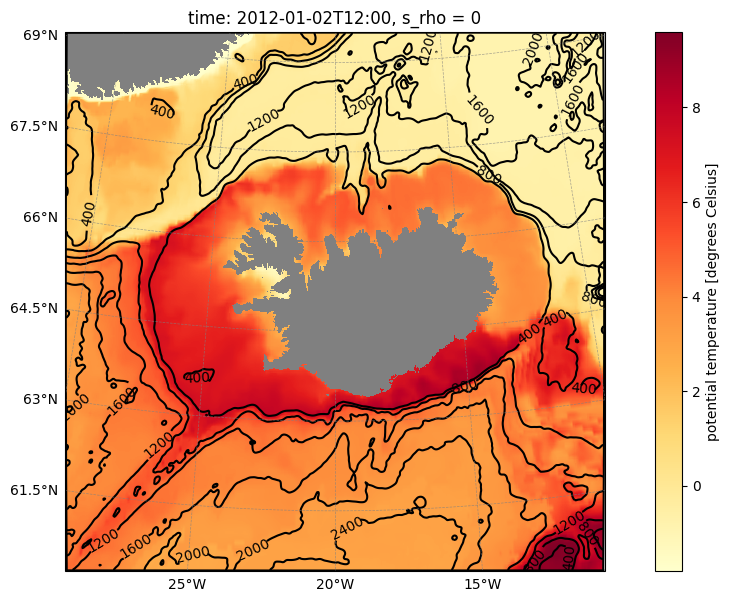

In [9]:
initial_conditions.plot("temp", s=0, depth_contours=True)  # plot bottom layer

Next, we slice our domain along one of the horizontal dimensions and look at temperature along these sections.

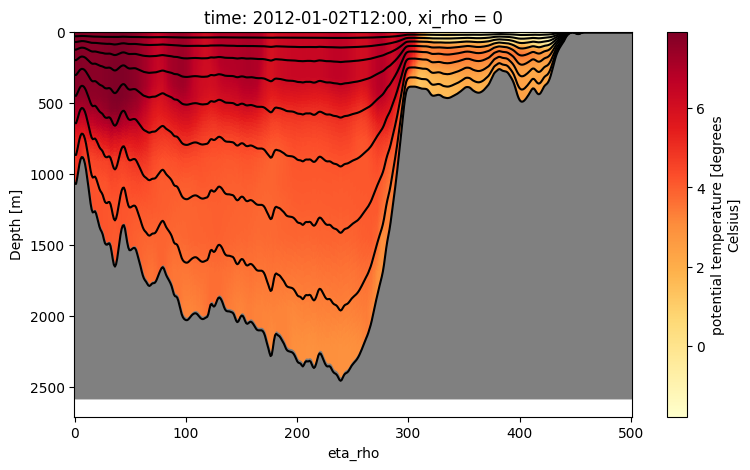

In [10]:
initial_conditions.plot("temp", xi=0, layer_contours=True)

Note that even though we have a total of 100 layers, `layer_contours = True` will create a plot with a maximum of 10 contours to ensure plot clarity.

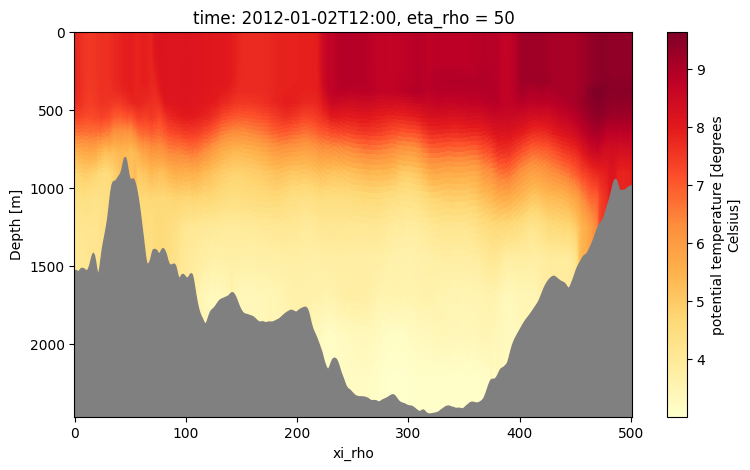

In [11]:
initial_conditions.plot("temp", eta=50, layer_contours=False)

We can also plot a depth profile at a certain spatial location.

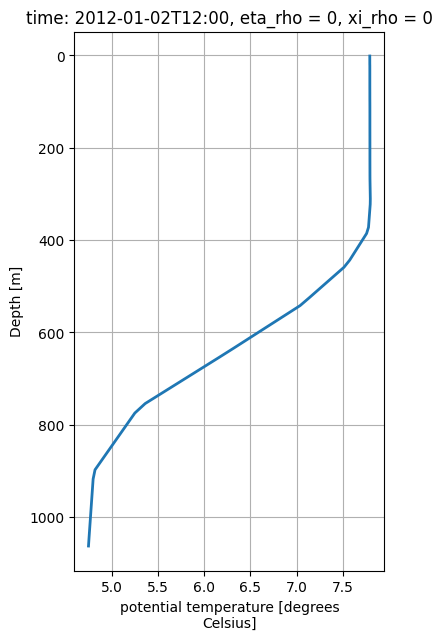

In [12]:
initial_conditions.plot("temp", eta=0, xi=0)

Finally, we can look at a transect in a certain layer and at a fixed `eta_rho` (similarly `xi_rho`).

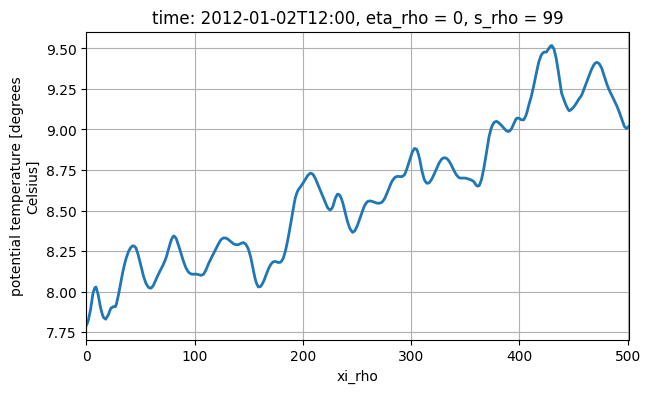

In [13]:
initial_conditions.plot("temp", eta=0, s=-1)

Plotting velocity fields works similarly.

[########################################] | 100% Completed | 7.70 sms


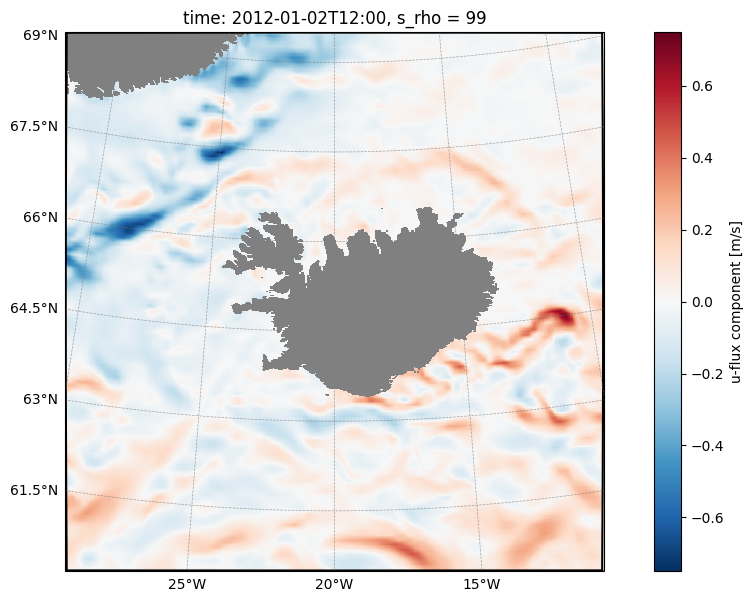

In [14]:
initial_conditions.plot("u", s=-1)  # plot uppermost layer

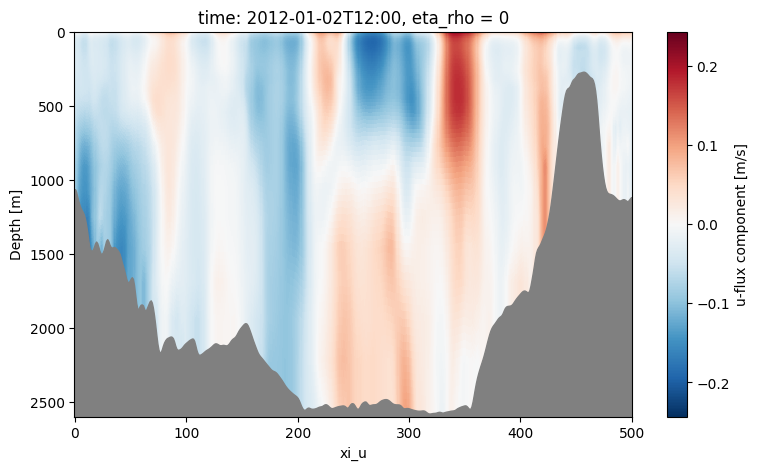

In [15]:
initial_conditions.plot("u", eta=0)

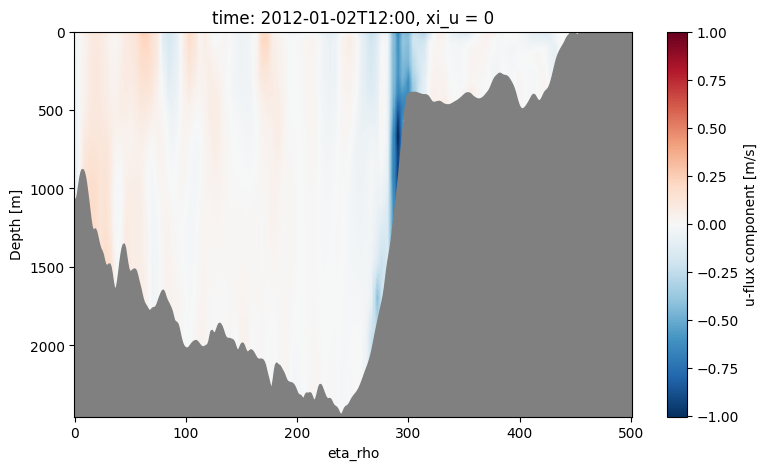

In [16]:
initial_conditions.plot("u", xi=0)

[########################################] | 100% Completed | 7.39 sms


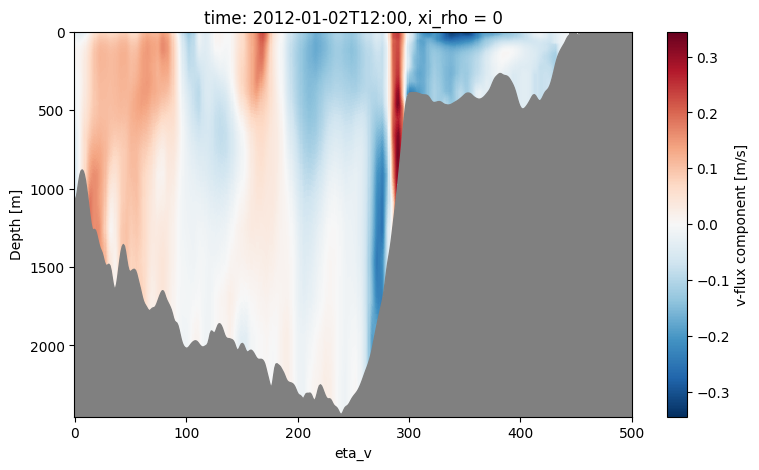

In [17]:
initial_conditions.plot("v", xi=0)

## Adding Biogeochemical (BGC) Initial Conditions  

To prepare a ROMS simulation with MARBL biogeochemistry (BGC), we need to generate both physical and biogeochemical initial conditions. Since ROMS requires a single initial conditions file, we create both sets of conditions together.  

We use the following datasets:  

- **Physical Initial Conditions:**  
  Derived from GLORYS data, including temperature, salinity, sea surface height, and velocities.  

- **Biogeochemical (BGC) Initial Conditions:**  
  Constructed from a climatology with 1° horizontal resolution, using two different approaches:  
  1. **CESM BGC climatology**  
  2. **A unified BGC climatology** combining multiple observationally and model based sources:  
     - Nutrient concentrations (nitrate, phosphate, silicate) and dissolved oxygen from the 2018 World Ocean Atlas  
     - Dissolved iron and nitrous oxide from in-situ measurements  
     - Dissolved inorganic carbon (DIC) and alkalinity from the global GLODAPv2 product
     - Remaining nutrients (ammonium, nitrite, and organic nitrogen) and dissolved organic matter from CESM model simulations

Both BGC climatologies can be accessed at the following locations:  

In [18]:
cesm_bgc_path = "/global/cfs/projectdirs/m4746/Datasets/CESM_REGRIDDED/CESM-climatology_lowres_regridded.nc"
unified_bgc_path = "/global/cfs/projectdirs/m4746/Datasets/UNIFIED/BGCdataset.nc"

The initial conditions are created as above, but now with additional information about the `bgc_source`.

In [19]:
%%time

initial_conditions_with_cesm_bgc = InitialConditions(
    grid=grid,
    ini_time=ini_time,
    source={"name": "GLORYS", "path": path},
    bgc_source={
        "name": "CESM_REGRIDDED",
        "path": cesm_bgc_path,
        "climatology": True,
    },  # bgc_source is optional
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)

CPU times: user 2min 6s, sys: 28.2 s, total: 2min 34s
Wall time: 11.3 s


In [20]:
initial_conditions_with_cesm_bgc.ds

<xarray.Dataset> Size: 4GB
Dimensions:      (ocean_time: 1, s_rho: 100, eta_rho: 502, xi_rho: 502,
                  xi_u: 501, eta_v: 501, s_w: 101)
Coordinates:
    abs_time     (ocean_time) datetime64[ns] 8B 2012-01-02T12:00:00
  * ocean_time   (ocean_time) float64 8B 3.788e+08
Dimensions without coordinates: s_rho, eta_rho, xi_rho, xi_u, eta_v, s_w
Data variables: (12/42)
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    u            (ocean_time, s_rho, eta_rho, xi_u) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    v            (ocean_time, s_rho, eta_v, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zeta         (ocean_time, eta_rho, xi_rho) float32 1MB -0.7428 ... -0.8718
    ubar         (ocean_time, eta_rho, xi_u) float32 1MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...           ...
    diazFe       (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    spCaCO3      (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zooC         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    w            (ocean_time, s_w, eta_rho, xi_rho) float32 102MB 0.0 ... 0.0
    Cs_r         (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    Cs_w         (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   3.1.2.dev23+gc2b82bc5c
    ini_time:                             2012-01-02 12:00:00
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  False
    source:                               GLORYS
    bgc_source:                           CESM_REGRIDDED
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

In [21]:
%%time

initial_conditions_with_unified_bgc = InitialConditions(
    grid=grid,
    ini_time=ini_time,
    source={"name": "GLORYS", "path": path},
    bgc_source={
        "name": "UNIFIED",
        "path": unified_bgc_path,
        "climatology": True,
    },  # bgc_source is optional
    model_reference_date=datetime(2000, 1, 1), # this is the default
    use_dask=True,
)

2025-12-22 14:33:28 - WARNING - Optional variables missing (but not critical): ['Lig', 'DIC_ALT_CO2', 'Alk_ALT_CO2']


CPU times: user 2min 31s, sys: 50.1 s, total: 3min 22s
Wall time: 11.4 s


In [22]:
initial_conditions_with_unified_bgc.ds

<xarray.Dataset> Size: 4GB
Dimensions:      (ocean_time: 1, s_rho: 100, eta_rho: 502, xi_rho: 502,
                  xi_u: 501, eta_v: 501, s_w: 101)
Coordinates:
    abs_time     (ocean_time) datetime64[ns] 8B 2012-01-02T12:00:00
  * ocean_time   (ocean_time) float64 8B 3.788e+08
Dimensions without coordinates: s_rho, eta_rho, xi_rho, xi_u, eta_v, s_w
Data variables: (12/42)
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    u            (ocean_time, s_rho, eta_rho, xi_u) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    v            (ocean_time, s_rho, eta_v, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zeta         (ocean_time, eta_rho, xi_rho) float32 1MB -0.7428 ... -0.8718
    ubar         (ocean_time, eta_rho, xi_u) float32 1MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...           ...
    Lig          (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    DIC_ALT_CO2  (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    ALK_ALT_CO2  (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    w            (ocean_time, s_w, eta_rho, xi_rho) float32 102MB 0.0 ... 0.0
    Cs_r         (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    Cs_w         (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   3.1.2.dev23+gc2b82bc5c
    ini_time:                             2012-01-02 12:00:00
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  False
    source:                               GLORYS
    bgc_source:                           UNIFIED
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

[########################################] | 100% Completed | 5.58 sms


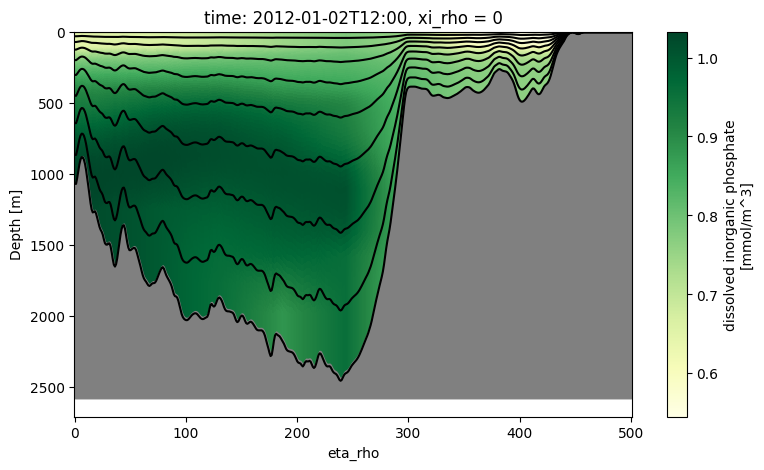

In [23]:
initial_conditions_with_cesm_bgc.plot("PO4", xi=0, layer_contours=True)

[########################################] | 100% Completed | 6.91 sms


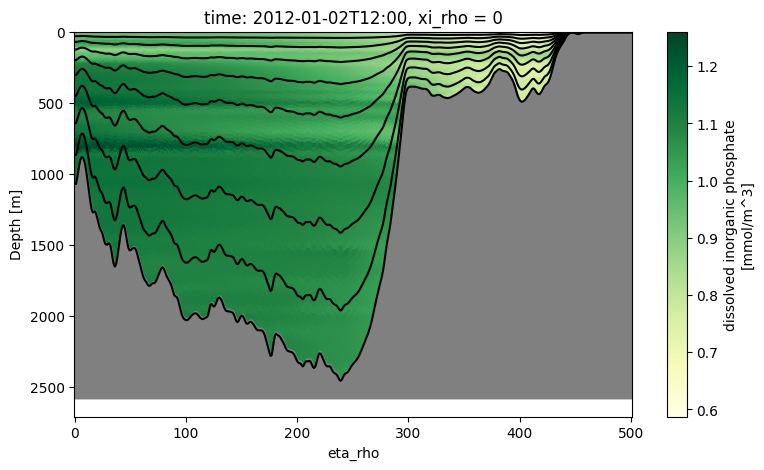

In [24]:
initial_conditions_with_unified_bgc.plot("PO4", xi=0, layer_contours=True)

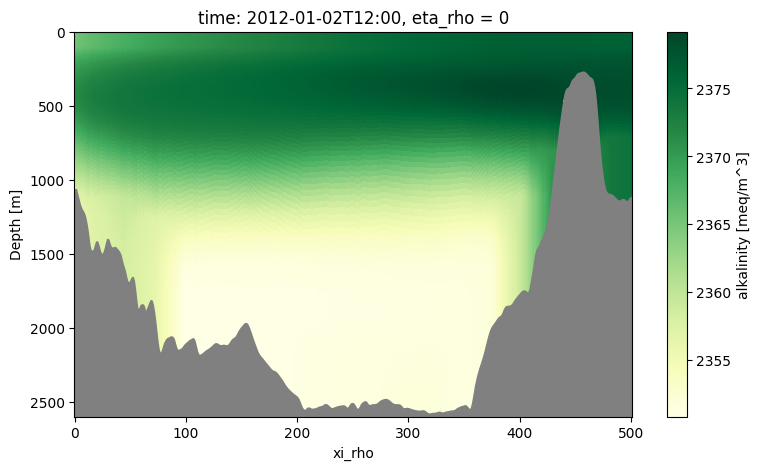

In [25]:
initial_conditions_with_cesm_bgc.plot("ALK", eta=0)

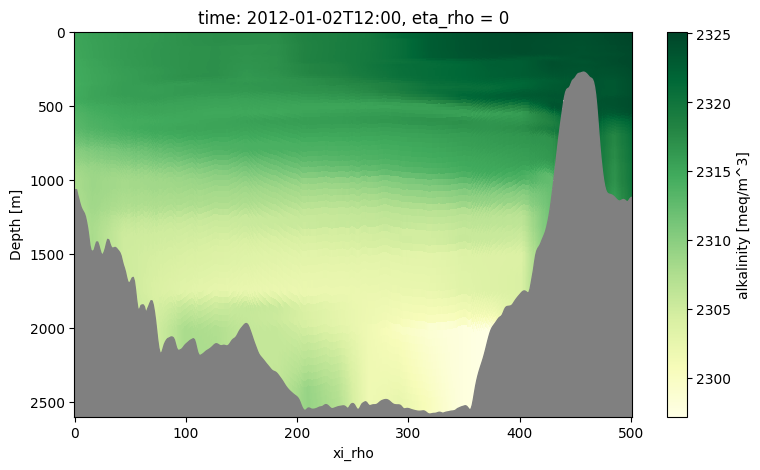

In [26]:
initial_conditions_with_unified_bgc.plot("ALK", eta=0)

## Initializing from ROMS Restart Files

When running a nested ROMS simulation, it is necessary to initialize the child simulation using a restart file from a previously run parent simulation. For a detailed guide on preparing nested simulations, see [Nested Simulations](https://roms-tools.readthedocs.io/en/latest/nesting.html).

Typically, you will have already created both the parent and child grid objects, as described in the nesting guide linked above. To initialize the child simulation, we first create the corresponding grid objects for both simulations.

In this example, the parent grid covers the northeast Pacific at a horizontal resolution of 3km and with 60 vertical layers.

In [27]:
parent_grid = Grid.from_file("/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac3km/eastpac_3km_grd.nc")

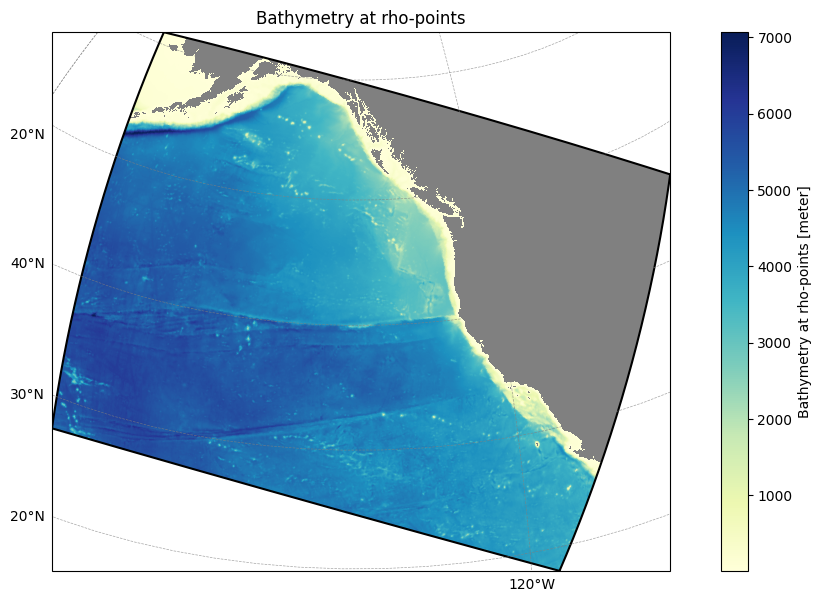

In [28]:
parent_grid.plot()

We will use the following restart file, produced by the parent grid simulation for **December 31, 2023, at 08:25:20**, to initialize the child grid.

In [29]:
restart_date = datetime(2023, 12, 31, 8, 25, 20)
restart_file = "/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac3km/eastpac3km_rst.20231231082520.nc"

The child grid covers the Salish Sea at a horizontal resolution of 600m and 100 vertical layers.

In [30]:
child_grid = Grid.from_file("/global/cfs/projectdirs/m4746/Datasets/ROMSOutput/eastpac3km/SalishSea_600m_grd.nc")

2025-12-22 14:33:56 - WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
2025-12-22 14:33:56 - INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
2025-12-22 14:33:56 - INFO - Total time: 0.003 seconds
2025-12-22 14:33:56 - INFO - ================================================================================================


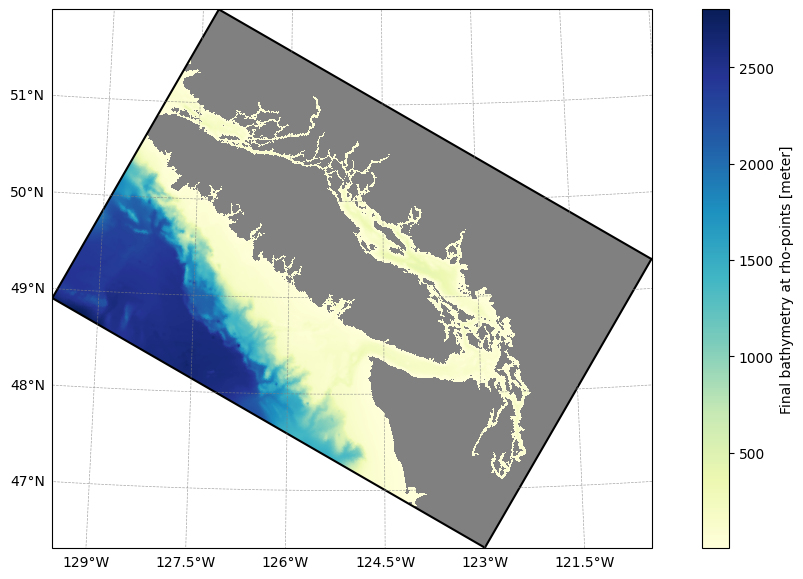

In [31]:
child_grid.plot()

We now create the initial conditions for the child simulations as follows.

In [32]:
%%time

initial_conditions_from_roms = InitialConditions(
    grid=child_grid,
    ini_time=restart_date, 
    source={"name": "ROMS", "grid": parent_grid, "path": restart_file},
    use_dask=True,
    bgc_source={
        "name": "ROMS",
        "grid": parent_grid,
        "path": restart_file,
    },
)

CPU times: user 12min 11s, sys: 11.9 s, total: 12min 23s
Wall time: 1min 32s


<div class="alert alert-info">

Note

In the cell above, we created the initial conditions using both `source` and `bgc_source` with the same information (the ROMS parent grid and restart file). If you do not provide `bgc_source`, `ROMS-Tools` will only read and prepare the physical variables from the restart file.

</div>

In [33]:
initial_conditions_from_roms.ds

<xarray.Dataset> Size: 9GB
Dimensions:      (ocean_time: 1, eta_rho: 642, xi_rho: 962, s_rho: 100,
                  xi_u: 961, eta_v: 641, s_w: 101)
Coordinates:
    abs_time     (ocean_time) datetime64[ns] 8B 2023-12-31T08:25:20
  * ocean_time   (ocean_time) float64 8B 7.573e+08
Dimensions without coordinates: eta_rho, xi_rho, s_rho, xi_u, eta_v, s_w
Data variables: (12/42)
    zeta         (ocean_time, eta_rho, xi_rho) float32 2MB dask.array<chunksize=(1, 642, 962), meta=np.ndarray>
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    u            (ocean_time, s_rho, eta_rho, xi_u) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    v            (ocean_time, s_rho, eta_v, xi_rho) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    ubar         (ocean_time, eta_rho, xi_u) float32 2MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...           ...
    diazFe       (ocean_time, s_rho, eta_rho, xi_rho) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    spCaCO3      (ocean_time, s_rho, eta_rho, xi_rho) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zooC         (ocean_time, s_rho, eta_rho, xi_rho) float32 247MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    w            (ocean_time, s_w, eta_rho, xi_rho) float32 250MB 0.0 ... 0.0
    Cs_r         (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    Cs_w         (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   3.1.2.dev23+gc2b82bc5c
    ini_time:                             2023-12-31 08:25:20
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  True
    source:                               ROMS
    bgc_source:                           ROMS
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0

Let's make some plots as before.

[########################################] | 100% Completed | 7.11 sms


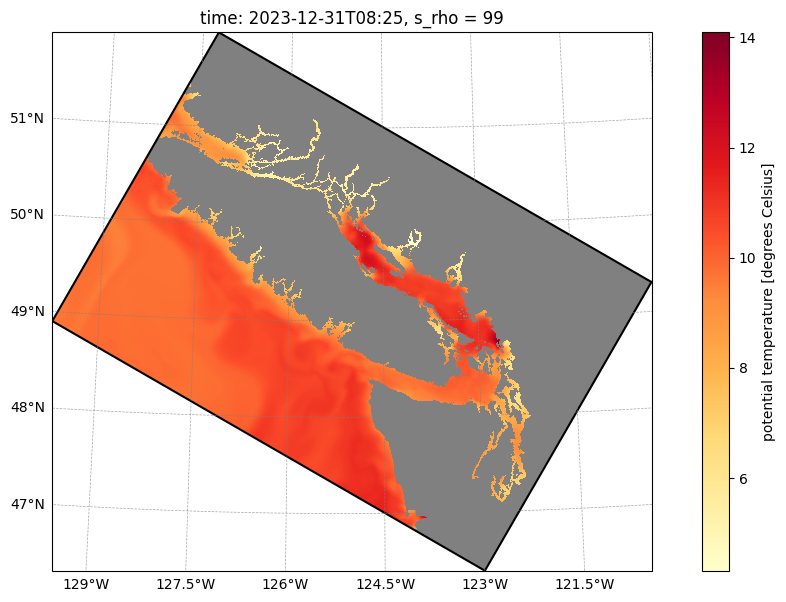

In [34]:
initial_conditions_from_roms.plot("temp", s=-1)

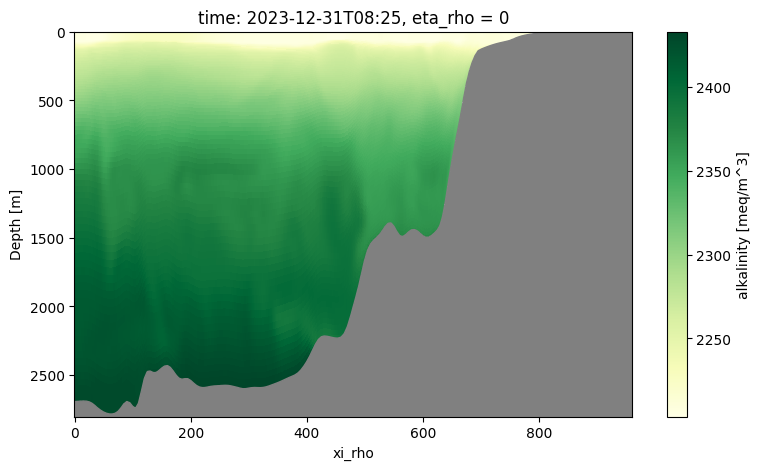

In [35]:
initial_conditions_from_roms.plot("ALK", eta=0)

## Strict vs. flexible initial time

The daily GLORYS dataset provides one time stamp per day, which in our locally available dataset is always at **12:00 UTC (noon)**. Similarly, the restart files typically contain 1–2 time stamps that may be at irregular times (as seen above).  

But what happens if we request an initial time that does not exactly match one of these available time stamps?

In [36]:
midnight_ini_time = datetime(2012, 1, 2, 0, 0, 0) # midnight on (i.e., the start of) January 2, 2012

In [37]:
initial_conditions_strict_midnight = InitialConditions(
    grid=grid,
    ini_time=midnight_ini_time,
    source={"name": "GLORYS", "path": path},
    use_dask=True,
)

ValueError: No exact match found for initial time 2012-01-02 00:00:00. Consider setting allow_flex_time to True.

If you request an initial time that does not exactly match one of these entries, `ROMS-Tools` will by default raise an error because it cannot find an exact match. This behavior is controlled by the `allow_flex_time` flag:

* False (default): requires an exact match to `ini_time`. A `ValueError` is raised if no match exists (see above example).
* True: allows a +24-hour search window starting from `ini_time` and selects the closest available entry within that window. If no match is found, a `ValueError` is still raised.

In [38]:
initial_conditions_flex_midnight = InitialConditions(
    grid=grid,
    ini_time=midnight_ini_time,
    allow_flex_time=True,
    source={"name": "GLORYS", "path": path},
    use_dask=True,
)

2025-12-22 08:53:06 - WARNING - Selected time entry closest to the specified start_time in +24 hour range: ['2012-01-02T12:00:00.000000000']


The logging output indicates which time stamp was actually selected. To verify, the following output confirms that `ROMS-Tools` adjusted the requested `midnight_ini_time` to the nearest available timestamp, which in this case was noon, 12 hours later.

In [39]:
initial_conditions_flex_midnight.ds.abs_time

<xarray.DataArray 'abs_time' (ocean_time: 1)> Size: 8B
array(['2012-01-02T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
    abs_time    (ocean_time) datetime64[ns] 8B 2012-01-02T12:00:00
  * ocean_time  (ocean_time) float64 8B 3.788e+08
Attributes:
    long_name:  absolute time

The same behavior applies when creating `InitialConditions` from a ROMS restart file. Instead of specifying the exact time December 31, 2023, at 08:25:20, we simply provide December 31, 2023, at 00:00 (midnight), together with `allow_flex_time = True`.

In [40]:
%%time

initial_conditions_from_roms_flex_time = InitialConditions(
    grid=child_grid,
    ini_time=datetime(2023, 12, 31), 
    allow_flex_time=True,
    source={"name": "ROMS", "grid": parent_grid, "path": restart_file},
    use_dask=True,
)

2025-12-22 08:53:12 - WARNING - Selected time entry closest to the specified start_time in +24 hour range: 2023-12-31T08:22:50.000000000


CPU times: user 2min 46s, sys: 3.55 s, total: 2min 49s
Wall time: 38.2 s


In [41]:
initial_conditions_from_roms_flex_time.ds.abs_time

<xarray.DataArray 'abs_time' (ocean_time: 1)> Size: 8B
array(['2023-12-31T08:22:50.000000000'], dtype='datetime64[ns]')
Coordinates:
    abs_time    (ocean_time) datetime64[ns] 8B 2023-12-31T08:22:50
  * ocean_time  (ocean_time) float64 8B 7.573e+08
Attributes:
    long_name:  absolute time

## Saving as NetCDF or YAML file

We can now save the dataset as a NetCDF file.

In [42]:
filepath = "/pscratch/sd/n/nloose/initial_conditions/my_initial_conditions.nc"

In [43]:
%time initial_conditions_with_cesm_bgc.save(filepath)

2025-12-22 08:53:50 - INFO - Writing the following NetCDF files:
/pscratch/sd/n/nloose/initial_conditions/my_initial_conditions.nc


[########################################] | 100% Completed | 92.28 s
CPU times: user 32min 53s, sys: 5min 19s, total: 38min 13s
Wall time: 1min 35s


[PosixPath('/pscratch/sd/n/nloose/initial_conditions/my_initial_conditions.nc')]

We can also export the parameters of our `InitialConditions` object to a YAML file.

In [44]:
yaml_filepath = "/pscratch/sd/n/nloose/initial_conditions/my_initial_conditions.yaml"

In [45]:
initial_conditions_with_cesm_bgc.to_yaml(yaml_filepath)

In [46]:
# Open and read the YAML file
with open(yaml_filepath, "r") as file:
    file_contents = file.read()

# Print the contents
print(file_contents)

---
roms_tools_version: 3.1.2.dev23+gc2b82bc5c
---
Grid:
  nx: 500
  ny: 500
  size_x: 1000
  size_y: 1000
  center_lon: -20
  center_lat: 65
  rot: 0
  N: 100
  theta_s: 5.0
  theta_b: 2.0
  hc: 300.0
  topography_source:
    name: SRTM15
    path: /global/cfs/projectdirs/m4746/Datasets/SRTM15/SRTM15_V2.6.nc
  mask_shapefile: null
  hmin: 5.0
InitialConditions:
  ini_time: '2012-01-02T12:00:00'
  source:
    name: GLORYS
    path: /global/cfs/projectdirs/m4746/Datasets/GLORYS/NA/2012/mercatorglorys12v1_gl12_mean_20120102.nc
    climatology: false
  bgc_source:
    name: CESM_REGRIDDED
    path: /global/cfs/projectdirs/m4746/Datasets/CESM_REGRIDDED/CESM-climatology_lowres_regridded.nc
    climatology: true
  model_reference_date: '2000-01-01T00:00:00'
  allow_flex_time: false
  horizontal_chunk_size: 50
  bypass_validation: false



## Creating initial conditions from an existing YAML file

In [47]:
%time the_same_initial_conditions_with_cesm_bgc = InitialConditions.from_yaml(yaml_filepath, use_dask=True)

CPU times: user 2min 1s, sys: 27.7 s, total: 2min 28s
Wall time: 13.5 s


In [48]:
the_same_initial_conditions_with_cesm_bgc.ds

<xarray.Dataset> Size: 4GB
Dimensions:      (ocean_time: 1, s_rho: 100, eta_rho: 502, xi_rho: 502,
                  xi_u: 501, eta_v: 501, s_w: 101)
Coordinates:
    abs_time     (ocean_time) datetime64[ns] 8B 2012-01-02T12:00:00
  * ocean_time   (ocean_time) float64 8B 3.788e+08
Dimensions without coordinates: s_rho, eta_rho, xi_rho, xi_u, eta_v, s_w
Data variables: (12/42)
    temp         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    salt         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    u            (ocean_time, s_rho, eta_rho, xi_u) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    v            (ocean_time, s_rho, eta_v, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zeta         (ocean_time, eta_rho, xi_rho) float32 1MB -0.7428 ... -0.8718
    ubar         (ocean_time, eta_rho, xi_u) float32 1MB dask.array<chunksize=(1, 50, 50), meta=np.ndarray>
    ...           ...
    diazFe       (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    spCaCO3      (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    zooC         (ocean_time, s_rho, eta_rho, xi_rho) float32 101MB dask.array<chunksize=(1, 100, 50, 50), meta=np.ndarray>
    w            (ocean_time, s_w, eta_rho, xi_rho) float32 102MB 0.0 ... 0.0
    Cs_r         (s_rho) float32 400B -0.992 -0.9753 ... -8.89e-05 -9.874e-06
    Cs_w         (s_w) float32 404B -1.0 -0.9837 -0.9667 ... -3.95e-05 0.0
Attributes:
    title:                                ROMS initial conditions file create...
    roms_tools_version:                   3.1.2.dev23+gc2b82bc5c
    ini_time:                             2012-01-02 12:00:00
    model_reference_date:                 2000-01-01 00:00:00
    adjust_depth_for_sea_surface_height:  False
    source:                               GLORYS
    bgc_source:                           CESM_REGRIDDED
    theta_s:                              5.0
    theta_b:                              2.0
    hc:                                   300.0